In [236]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go
import plotly.subplots as sp
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
import warnings


In [238]:
# Load the dataset
df = pd.read_csv("Number of EV charging Stations on National Highways.csv")
df.head (5)


,Sl. No.,State/UTs,Number of EV charging Stations on National Highways
0,1,Andaman and Nicobar Islands,1
1,2,Andhra Pradesh,249
2,3,Arunachal Pradesh,30
3,4,Assam,147
4,5,Bihar,96


In [240]:
df.info(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   Sl. No.                                              34 non-null     object
 1   State/UTs                                            34 non-null     object
 2   Number of EV charging Stations on National Highways  34 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 948.0+ bytes


In [242]:
df.describe()

,Number of EV charging Stations on National Highways
count,34.000000
mean,311.352941
std,897.689961
min,1.000000
25%,27.750000
50%,106.000000
75%,244.500000
max,5293.000000


In [244]:
df.rename(columns={'State/UTs': 'State', 'Number of EV charging Stations on National Highways': 'Charging StationsNH'}, inplace=True)
print(df.columns)


Index(['Sl. No.', 'State', 'Charging StationsNH'], dtype='object')


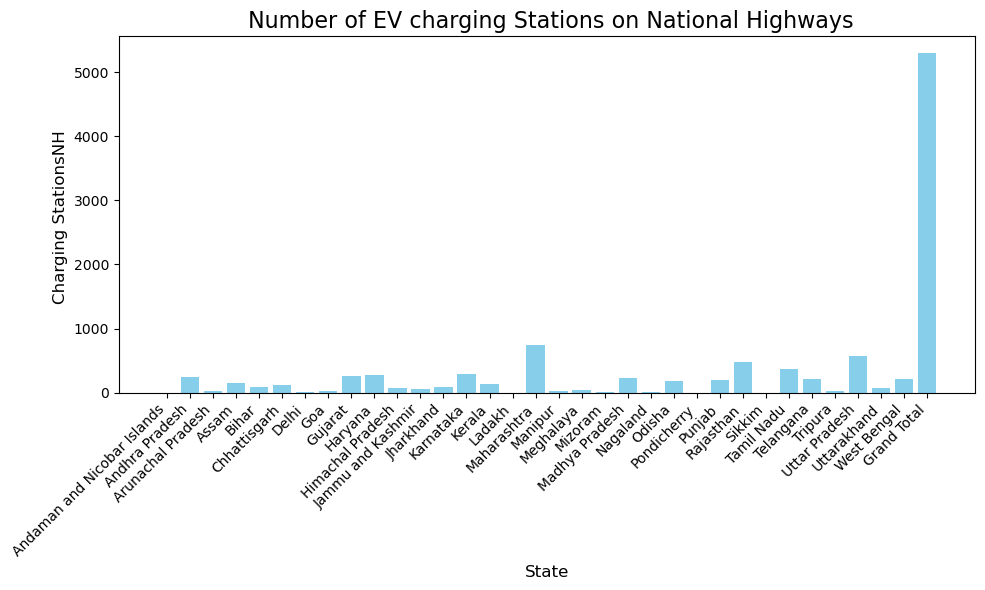

In [246]:
# Plotting the distribution of EV charging stations using Matplotlib
plt.figure(figsize=(10, 6))
plt.bar(df['State'], df['Charging StationsNH'], color='skyblue')
plt.title(' Number of EV charging Stations on National Highways', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Charging StationsNH ', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

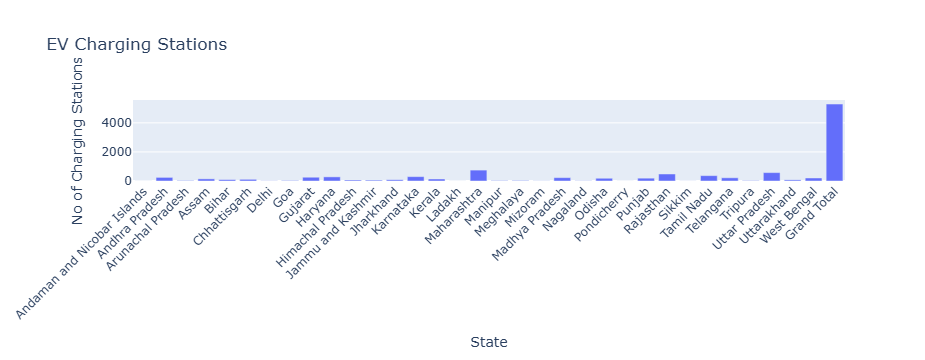

In [248]:
#Using Plotly Express for an interactive bar chart
fig = px.bar(df, x='State', y='Charging StationsNH', title= '   EV Charging Stations  ')
fig.update_layout(xaxis_title='State', yaxis_title='No of Charging Stations', xaxis_tickangle=-45)
fig.show()




In [250]:
# Heatmap using Seaborn to visualize correlations if numerical columns exist
if len(df.select_dtypes(include=['float64', 'int64']).columns) > 1:
    plt.figure(figsize=(8, 6))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap', fontsize=16)
    plt.show()

C:\Users\Welcome\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



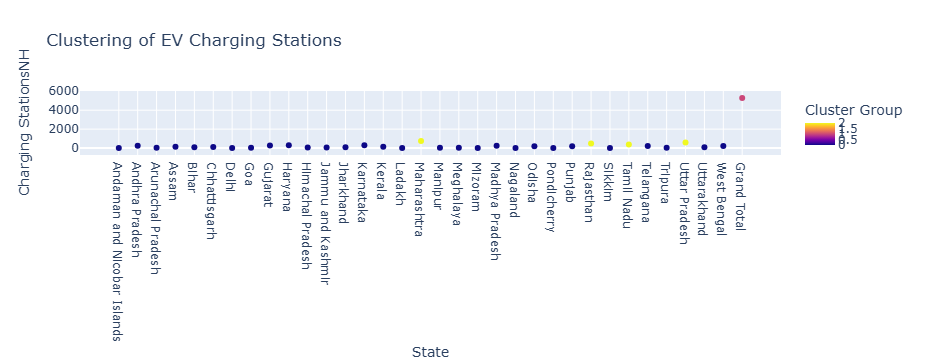

In [252]:
if 'Charging StationsNH' in df.columns:
    scaler = MinMaxScaler()
    df_scaled = scaler.fit_transform(df[['Charging StationsNH']])

    # Perform KMeans clustering
    kmeans = KMeans(n_clusters=3, random_state=42)
    df['Cluster'] = kmeans.fit_predict(df_scaled)

    # Visualize clusters
    fig = px.scatter(df, x='State', y='Charging StationsNH', color='Cluster', 
                     title='Clustering of EV Charging Stations', 
                     labels={'Cluster': 'Cluster Group'})
    fig.show()

In [254]:
df1 = pd.read_csv("RS_Session_259_AU_3475_1.csv")
df1.head(5)

,S. No.,State Name,Electric Vehicle Count
0,1,Andaman and Nicobar Island,182
1,2,Andhra Pradesh,51322
2,3,Arunachal Pradesh,24
3,4,Assam,94929
4,5,Bihar,128885


In [256]:
df1.rename(columns={'State Name': 'State', 'Electric Vehicle Count':'EV Count'}, inplace=True)
print(df1.columns)

Index(['S. No.', 'State', 'EV Count'], dtype='object')


In [258]:
df2 = pd.read_csv('EVMaker_by_Place.csv')
df2.head()


,EV Maker,Place,State
0,Tata Motors,Pune,Maharashtra
1,Mahindra Electric,Bengaluru,Karnataka
2,Ather Energy,Bengaluru,Karnataka
3,Hero Electric,New Delhi,Delhi
4,Ola Electric,Krishnagiri,Tamil Nadu


In [260]:
print(df2.columns)

Index(['EV Maker', 'Place', 'State'], dtype='object')


In [262]:
# Merge datasets on 'State' column
merged_data = pd.merge(df,df1 , on='State', how='inner')
merged_data = pd.merge(merged_data, df2, on='State', how='inner')
# Fill missing values
merged_data.fillna(0, inplace=True)
# Display the first few rows
print(merged_data.head())


  Sl. No.           State  Charging StationsNH  Cluster S. No.  EV Count  \
0       2  Andhra Pradesh                  249        0      2     51322   
1       7           Delhi                   10        0      8    203263   
2       7           Delhi                   10        0      8    203263   
3       7           Delhi                   10        0      8    203263   
4       7           Delhi                   10        0      8    203263   

                      EV Maker      Place  
0             Kia Motors India  Anantapur  
1                Hero Electric  New Delhi  
2          YC Electric Vehicle      Delhi  
3  Dilli Electric Auto Pvt Ltd  New Delhi  
4                 Euler Motors  New Delhi  


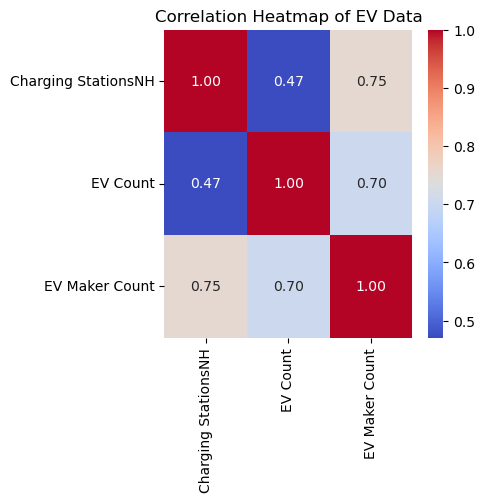

In [276]:
# Select numerical columns for correlation analysis
numerical_columns = ['Charging StationsNH', 'EV Count', 'EV Maker Count']
correlation_matrix = final_data[numerical_columns].corr()

# Plot heatmap
plt.figure(figsize=(4, 4))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    cbar=True
)
plt.title("Correlation Heatmap of EV Data")
plt.show()


C:\Users\Welcome\AppData\Local\Temp\ipykernel_4484\229725631.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Welcome\AppData\Local\Temp\ipykernel_4484\229725631.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



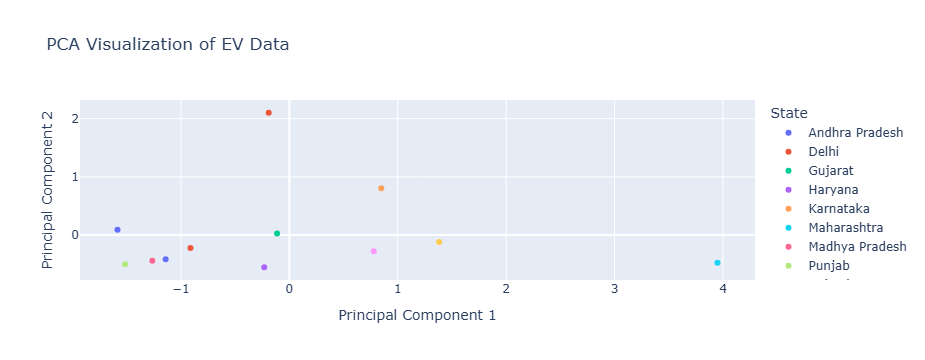

             State  Charging StationsNH  EV Count  EV Maker Count      PCA1  \
0   Andhra Pradesh                  249     51322               1 -1.141281   
1            Delhi                   10    203263               4 -0.190797   
5          Gujarat                  259     99236               5 -0.113389   
10         Haryana                  284     56243               6 -0.232037   
16       Karnataka                  300    183536               6  0.847551   

        PCA2  
0  -0.415354  
1   2.101816  
5   0.027454  
10 -0.554914  
16  0.802747  


In [264]:
# Aggregate EV Maker counts per state
merged_data['EV Maker Count'] = merged_data.groupby('State')['EV Maker'].transform('count')

# Drop duplicate rows based on State
final_data = merged_data.drop_duplicates(subset=['State'])

# Select numerical columns for PCA
numerical_columns = ['Charging StationsNH', 'EV Count', 'EV Maker Count']
scaler = StandardScaler()
scaled_data = scaler.fit_transform(final_data[numerical_columns])

# Apply PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Add PCA results to the dataset
final_data['PCA1'] = pca_data[:, 0]
final_data['PCA2'] = pca_data[:, 1]

# Visualize PCA
fig = px.scatter(
    final_data, x='PCA1', y='PCA2', color='State',
    title='PCA Visualization of EV Data',
    labels={'PCA1': 'Principal Component 1', 'PCA2': 'Principal Component 2'}
)
fig.show()

# Display final aggregated dataset
print(final_data[['State', 'Charging StationsNH', 'EV Count', 'EV Maker Count', 'PCA1', 'PCA2']].head())
